Considerando una bomba modelo B3Z-M en el tramo 1, con un diámetro de 8,438’’ (Página 45 del catálogo Berkeley)
Determinar el caudal de operación.

![Ejemplo 2](images/M2_E3.png)

Datos:
* Cañerías de acero comercial
* L1 = 7 m
* L2 = 15 m
* L3 = 20 m
* L4 = 5 m
* D1 = 5 cm
* D2 = D3 = D4 = 6 cm
* 2 codos de 45º
* 1 codo de 90° en cada tramo (2 y 3)
* 2 uniones T.


In [1]:
import CoolProp.CoolProp as cp
import fluids as fld
import numpy as np
from scipy import constants
from scipy import optimize as op
from fluids.vectorized import * 

Datos:

In [2]:
g = constants.value(u'standard acceleration of gravity')

D = np.array([5 , 6, 6, 6]) /100 #Centímetros a metros
L = np.array([7, 15, 20, 5])
z = 20

epsilon = 0.0046/10

fluid = "water"
rho = cp.PropsSI('D','T', 300, 'P',101325,fluid)
mu = cp.PropsSI('V','T', 300, 'P',101325,fluid)


Determinamos los valores de K (Crane) que no dependen del caudal

In [3]:
#Tramo 1
K_1 = fld.entrance_sharp() + fld.diffuser_sharp(Di1=D[0], Di2=D[1])
#Tramo 2
#K_2_c =  2 * fld.bend_rounded_Crane(Di=D[1], bend_diameters=1, angle=45) + fld.bend_rounded_Crane(Di=D[1], bend_diameters=1, angle=90)
K_2_c =  2 * 0.35 + 1.4
#Tramo 3
#K_3_c= fld.bend_rounded_Crane(Di=D[2], bend_diameters=1, angle=90)
K_3_c = 1.4
#Tramo 4
K_4 = fld.exit_normal()

K = np.array([K_1, K_2_c, K_3_c, K_4])
K

array([0.6633642, 2.1      , 1.4      , 1.       ])

Cabezal de la bomba


In [4]:
Hp = np.array(range(30))


In [5]:
def variations(V_dot,EHp):
    DELTA[0] = - ((C[0] + C[3]) * V_dot[0] * abs(V_dot[0]) + C[2] * V_dot[2] * abs(V_dot[2]) - z) / (2 * C[2]* abs(V_dot[2]) + 2*(C[0] + C[3])* abs(V_dot[0]))
    DELTA[1] = - (C[2] * V_dot[2] * abs(V_dot[2]) - C[1] * V_dot[1] * abs(V_dot[1]) - EHp) / (2 * C[2]* abs(V_dot[2]) + 2*C[1]* abs(V_dot[1]))
    DELTA[2] =   DELTA[0] - DELTA[1]
    DELTA[3] =  DELTA[0]
    return DELTA

In [6]:
V_dot_plot = np.empty(0)
V_dot_plot_2 = np.empty(0)

for j in Hp:
    V_dot = np.array([20 , 10 ,  10 ,  20])/1000
    DELTA = np.ones(4)/1000
    for i in range(100):
        V = (V_dot * 4)/(np.pi * D*D)
        Re = Reynolds(D, rho, V, mu)
        f = friction_factor(Re, eD=epsilon/D)
        K_2_T = fld.K_run_diverging_Crane(D[1], D[2], V_dot[1], V_dot[2], angle=90) + fld.K_branch_converging_Crane(D[2], D[1],V_dot[2],V_dot[1], angle=90)
        K[1] = K_2_c + K_2_T 
        K_3_T =  fld.K_branch_diverging_Crane(D[1], D[2], V_dot[1], V_dot[2], angle=90) + fld.K_run_converging_Crane(D[2], D[1],V_dot[2],V_dot[1], angle=90)
        K[2] = K_3_c + K_3_T 
        C = (8/(np.pi**2 * g * D**4))  * (f * L/D + K)
        DELTA = variations(V_dot,Hp[j])
        V_dot += DELTA
        if DELTA[0]<=1e-6: 
            print(V_dot)
            break
    
    V_dot_plot =np.append(V_dot_plot, V_dot[0])
    V_dot_plot_2 =np.append(V_dot_plot_2, V_dot[1])

[0.01492898 0.00933009 0.00559889 0.01492898]
[0.01492898 0.00963147 0.00529751 0.01492898]
[0.01492898 0.00993285 0.00499613 0.01492898]
[0.01492898 0.01023423 0.00469475 0.01492898]
[0.01492898 0.01053561 0.00439337 0.01492898]
[0.01492898 0.01083698 0.004092   0.01492898]
[0.01492898 0.01113836 0.00379062 0.01492898]
[0.01492898 0.01143974 0.00348924 0.01492898]
[0.01492898 0.01174112 0.00318786 0.01492898]
[0.01492898 0.0120425  0.00288648 0.01492898]
[0.01492898 0.01234388 0.0025851  0.01492898]
[0.01492898 0.01264525 0.00228373 0.01492898]
[0.01492898 0.01294663 0.00198235 0.01492898]
[0.01492898 0.01324801 0.00168097 0.01492898]
[0.01492898 0.01354939 0.00137959 0.01492898]
[0.01492898 0.01385077 0.00107821 0.01492898]
[0.01492898 0.01415214 0.00077684 0.01492898]
[0.01492898 0.01445352 0.00047546 0.01492898]
[0.01492898 0.0147549  0.00017408 0.01492898]
[ 0.01492898  0.01505628 -0.0001273   0.01492898]
[ 0.01492898  0.01535766 -0.00042868  0.01492898]
[ 0.01492898  0.01565903 -

In [7]:
V_dot_plot

array([0.01492898, 0.01492898, 0.01492898, 0.01492898, 0.01492898,
       0.01492898, 0.01492898, 0.01492898, 0.01492898, 0.01492898,
       0.01492898, 0.01492898, 0.01492898, 0.01492898, 0.01492898,
       0.01492898, 0.01492898, 0.01492898, 0.01492898, 0.01492898,
       0.01492898, 0.01492898, 0.01492898, 0.01492898, 0.01492898,
       0.01492898, 0.01492898, 0.01492898, 0.01492898, 0.01492898])

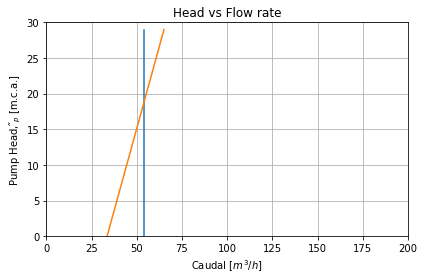

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(V_dot_plot*3600, Hp, label="$\dot{V}_1$")
plt.plot(V_dot_plot_2*3600, Hp,label="$\dot{V}_2$")
plt.xlabel("Caudal [$m^3/h$]")
plt.ylabel(r"Pump Head, $\H_p$ [m.c.a.]")
plt.title("Head vs Flow rate")
plt.xlim([0, 200])
plt.ylim([0, 30])
plt.grid(True)
plt.tight_layout()